In [300]:
import pandas as pd
import numpy as np

In [ ]:
def rc(seq):
 return "".join([{
     "A":"T",
     "T":"A",
     "G":"C",
     "C":"G"
 }[e] for e in seq][::-1])


In [289]:
fa_found = []
def wfun(arg,dirname,fnames):
    for f in fnames:
        if f[-2:]=="fa":
            fa_found.append(os.path.join(dirname,f))
            
import os
os.path.walk("../out/b_demultiplex/",wfun,None)

r2 = [f for f in fa_found if "R2_" in f and "HCT116_Gemcitabine2uM_BR1" in f and "14" in f]
r1 = [f for f in fa_found if "R1_" in f and "HCT116_Gemcitabine2uM_BR1" in f and "14" in f]

f2 = r2[0]
f1 = r1[0]

umis = []
t_umis = []
with open(f1) as f1open:
  with open(f2) as f2open:
    i = -1
    while 1:
        i+=1
        try:
            l1 = f1open.next()
            l2 = f2open.next()
        except StopIteration:
            break
            
        if i %2 == 0: continue
        if "N" in l2[:16]: continue
        umi = rc(l2[:15].strip())
        umis.append(umi)          
        t_umi = l1[:10].strip()
        t_umis.append(t_umi)
        
        


In [338]:
most_oligos_2_transcripts = dict()
doubled_oligos_2_transcripts = dict()
positive_ctrl_oligos_2_transcripts = dict()

with open(f1) as f1open:
  with open(f2) as f2open:
    i = -1
    while 1:
        i+=1
        try:
            l1 = f1open.next()
            l2 = f2open.next()
        except StopIteration:
            break
            
        if i %2 == 0: continue
        if "N" in l2[:16]: continue
        o_umi = l2[:15].strip()
        t_umi = l1.strip()[:10]
        
        if o_umi in longest_umis:
            most_oligos_2_transcripts[o_umi] = most_oligos_2_transcripts.get(o_umi,[])+[t_umi]
            
        if o_umi in doubled_umis:
            doubled_oligos_2_transcripts[o_umi] = doubled_oligos_2_transcripts.get(o_umi,[])+[t_umi]
            
        if o_umi in all_barcodes_list:
            positive_ctrl_oligos_2_transcripts[o_umi] = positive_ctrl_oligos_2_transcripts.get(o_umi,[])+[t_umi]


In [342]:
print len(positive_ctrl_oligos_2_transcripts)
print sum([len(v) for v in positive_ctrl_oligos_2_transcripts.values()])



16
28


[5, 1, 5, 8, 1766, 3, 2, 2, 2, 17]
[5, 1, 5, 8, 1857, 3, 2, 2, 2, 17]
[]
[]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 2, 2]
[1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 4, 1, 1, 3, 4]


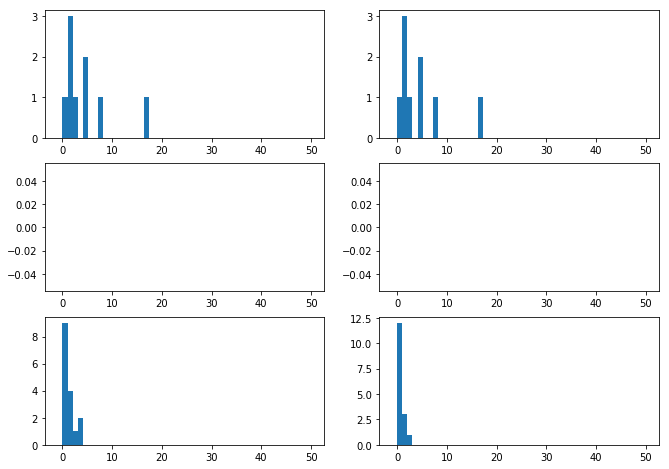

In [339]:
oligo_t_counts = dict([(k,len(v)) for k, v in most_oligos_2_transcripts.iteritems()])
oligo_t_unique_counts = dict([(k,len(set(v))) for k, v in most_oligos_2_transcripts.iteritems()])

fig,subs = plt.subplots(3,2)
fig.set_size_inches(11,8)

subs[0][0].hist(oligo_t_counts.values(),bins = linspace(-1,50,51))
subs[0][1].hist(oligo_t_unique_counts.values(),bins = linspace(-1,50,51))


print oligo_t_unique_counts.values()
print oligo_t_counts.values()


oligo_t_counts = dict([(k,len(v)) for k, v in doubled_oligos_2_transcripts.iteritems()])
oligo_t_unique_counts = dict([(k,len(set(v))) for k, v in doubled_oligos_2_transcripts.iteritems()])

subs[1][0].hist(oligo_t_counts.values(),bins = linspace(-1,50,51))
subs[1][1].hist(oligo_t_unique_counts.values(),bins = linspace(-1,50,51))


print oligo_t_unique_counts.values()
print oligo_t_counts.values()

oligo_t_counts = dict([(k,len(v)) for k, v in positive_ctrl_oligos_2_transcripts.iteritems()])
oligo_t_unique_counts = dict([(k,len(set(v))) for k, v in positive_ctrl_oligos_2_transcripts.iteritems()])

subs[2][0].hist(oligo_t_counts.values(),bins = linspace(-1,50,51))
subs[2][1].hist(oligo_t_unique_counts.values(),bins = linspace(-1,50,51))


print oligo_t_unique_counts.values()
print oligo_t_counts.values()




In [292]:
import itertools as it
sorted_umis = sorted(umis)
lens = [ len(list(g)) for k,g in it.groupby(sorted_umis) ]
umi_counts = dict([[k,len(list(g))] for k,g in it.groupby(sorted_umis)])
longest_umis = [e[0] for e in sorted(umi_counts.iteritems(),key=lambda x:x[1])][-20:][::-1]
doubled_umis = [k for k,v in umi_counts.iteritems() if v== 2][-20:][::-1]

sorted_t_umis = sorted(t_umis)
t_umi_lens = [ len(list(g)) for k,g in it.groupby(sorted_t_umis) ]
t_umi_counts = dict([[k,len(list(g))] for k,g in it.groupby(sorted_t_umis)])
longest_t_umis = [e[0] for e in sorted(t_umi_counts.iteritems(),key=lambda x:x[1])][-20:][::-1]
doubled_t_umis = [k for k,v in t_umi_counts.iteritems() if v== 2][-20:][::-1]

In [295]:
print len(t_umi_counts)
print len(umi_counts)


786909
1826829


Text(0.5,1,'oligo umi frequency distirbution')

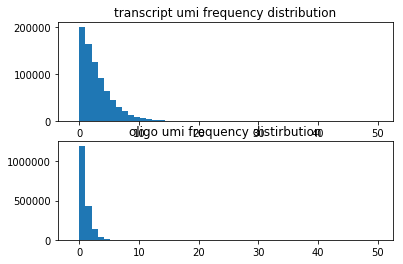

In [298]:
bins = np.linspace(-1,50,51)

f,subs = plt.subplots(2,1)
subs[0].hist(t_umi_lens, bins = bins)
subs[1].hist(lens, bins = bins)
subs[0].set_title( "transcript umi frequency distribution")
subs[1].set_title( "oligo umi frequency distirbution")

In [214]:
it.groupby(sorted_umis)

In [211]:
x = sorted(umi_counts.iteritems(),key=lambda x:x[1])

In [154]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
print max(lens)
print sum(lens)
print [lens.count(i) for i in range(10)]
print lens.count(2)

print "{0} umis observed 20x or more".format(len([l for l in lens if l>20]))
print "{0} umis observed 100x or more".format(len([l for l in lens if l>100]))

#h= np.histogram(np.log(lens))

#print h[0]
#print h[1]
#plt.bar( h[1][:-1],np.log(h[0]))
#plt.hist(np.log(lens),bins = np.linspace(-1,20))

1857
2744076
[0, 1198476, 428194, 140372, 41909, 12257, 3738, 1172, 417, 148]
428194
13 umis observed 20x or more
2 umis observed 100x or more


In [155]:
n = len(umis)
d = 1000000
expected_collisions = n-d+d*(float((d-1))/d)**n
print round(expected_collisions)

print round(n - expected_collisions)

from scipy.misc import comb
n_observed_collisions =comb(range(2,50),2+np.zeros(48)) *np.array([lens.count(i) for i in range(2,50)])
print n_observed_collisions
print sum(n_observed_collisions)

print float(expected_collisions)/n

1808384.0
935692.0
[4.28194e+05 4.21116e+05 2.51454e+05 1.22570e+05 5.60700e+04 2.46120e+04
 1.16760e+04 5.32800e+03 3.06000e+03 1.43000e+03 9.90000e+02 8.58000e+02
 1.82000e+02 2.10000e+02 2.40000e+02 4.08000e+02 0.00000e+00 5.13000e+02
 1.90000e+02 2.10000e+02 2.31000e+02 5.06000e+02 2.76000e+02 3.00000e+02
 0.00000e+00 3.51000e+02 3.78000e+02 0.00000e+00 0.00000e+00 4.65000e+02
 4.96000e+02 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
1332314.0
0.659013673664


/cluster/bh0085/anaconda27/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.
  if __name__ == '__main__':


In [120]:

#1857
#2744076
#[0, 1198476, 428194, 140372, 41909, 12257, 3738, 1172, 417, 148]
#428194
#13 umis observed 20x or more
#2 umis observed 100x or more

#1.99M for 291608 collisions (only including the pairwise collisions)
x =1990000
print 2277470 - 291608 -x + ((x-1)/x)**2277470

#1.7M for 577570 collisions (this includes the tail of the distribution, using nC2 to compute the number of pairs for each)
#approximate combined matches = 577470
2277470 - 1700000 + ((1700000-1)/1700000)**2277470


In [318]:

#for DLD1_WT_BR2
#max lens: 1120
#sum lens: 2277470 (- n UMIs)
#length distribution: [0, 1454994, 291608, 57761, 11567, 2524, 598, 163, 56, 32]

#3 umis observed 20x or more
#1 umis observed 100x or more

#1.99M for 291608 collisions (only including the pairwise collisions)
x =float(700156) #library size
coll = 1332314.0 #number of matches
n = float(2277470) # n_umis

print n - coll -x + x*((x-1)/x)**n

root = findroot(lambda y:n - coll -y + y*((y-1)/y)**n, 500000)
print root

#1.7M for 577570 collisions (this includes the tail of the distribution, using nC2 to compute the number of pairs for each)
#approximate combined matches = 577470
#2277470 - 1700000 + ((1700000-1)/1700000)**2277470


272071.924199
1073998.46975068


In [337]:
import sympy
from sympy import *
from mpmath import *

#x = Symbol('x')
#y = Symbol('y')
#sympy.solve(x-1,x)

#FOR THE GEM CELL LINE

collisions = 450000 #number of matches
n = 2744076 # n_umis
#soln = sympy.solve(n - coll -x + x*((x-1)/x)**n,x)
#print soln

root = findroot(lambda y: n - collisions -y + y*((y-1)/y)**n, 10000000)
print root

print n - collisions - root + root*((root-1)/root)**n



7424461.38703947
0.000431166961789131


In [333]:
collisions - n

-2444076

In [331]:
11617510.3802176* ((11617510.3802176 -1) / (11617510.3802176))**n - 11617510.3802176

-2444075.999052163

In [336]:
len([e for e in lens if e == 2])

428194